In [1]:
#importing all the module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
import seaborn
%matplotlib inline

In [2]:
sensor0 = pd.read_csv('sensor0.csv')
sensor2 = pd.read_csv('sensor2.csv')
sensor3 = pd.read_csv('sensor3.csv')
sensor4 = pd.read_csv('sensor4.csv')

In [3]:
sensor_comb1 = pd.merge(sensor0,sensor2, on='dt', how='inner')
sensor_comb2 = pd.merge(sensor3,sensor4, on='dt', how='inner')

In [4]:
sensor_comb1 = sensor_comb1[[u'dt', u'sensor_x', u'con_x', u'spl_x', u'sensor_y', u'con_y', u'spl_y', u'date_y',
       u'time_y']]

In [5]:
sensor_comb2 = sensor_comb2[[u'dt', u'sensor_x', u'con_x', u'spl_x', u'sensor_y', u'con_y', u'spl_y', u'date_y',
       u'time_y']]

In [6]:
sensor = pd.merge(sensor_comb1,sensor_comb2, on='dt', how='inner')

In [7]:
sensor =sensor.drop([ u'sensor_x_x',u'sensor_y_x',u'date_y_x', u'time_y_x', u'sensor_x_y',u'sensor_y_y'],axis=1)

In [8]:
sensor.head(3)

,dt,con_x_x,spl_x_x,con_y_x,spl_y_x,con_x_y,spl_x_y,con_y_y,spl_y_y,date_y_y,time_y_y
0,2016-06-21 00:00:00,2834.03125,66.308479,1691.99625,70.375943,1686.44125,76.235738,2324.65875,70.652334,2016-06-21,00:00:00
1,2016-06-21 04:00:00,2748.28875,81.467436,2550.94500,72.334450,2041.33000,79.445869,3041.73875,81.499422,2016-06-21,04:00:00
2,2016-06-21 08:00:00,2720.35125,80.020600,3088.82750,76.372047,2369.71750,80.738609,2757.67250,77.785565,2016-06-21,08:00:00


In [9]:
sensor['con']= (sensor.con_x_x+sensor.con_y_x+sensor.con_x_y+sensor.con_y_y)/4
sensor['spl']= (sensor.spl_x_x+sensor.spl_y_x+sensor.spl_x_y+sensor.spl_y_y)/4
sensor = sensor.rename(columns={'date_y_y':'date','time_y_y':'time'})

In [10]:
sensor = sensor[['dt','con','spl','date','time']]

In [11]:
weather = pd.read_csv('weather.csv')

In [12]:
weather.head()

,Time,Temp.,Humidity,Pressure,Day
0,0:00,72.500,70.00,29.8325,21-06-2016
1,4:00,76.225,62.50,29.7900,21-06-2016
2,8:00,82.475,34.25,29.8375,21-06-2016
3,12:00,85.725,35.50,29.8075,21-06-2016
4,16:00,80.525,56.25,29.7625,21-06-2016


In [13]:
weather['date']= sensor.date

In [14]:
sensor_weather = pd.merge(sensor, weather, on ='date')

In [15]:
sensor_weather.head()

,dt,con,spl,date,time,Time,Temp.,Humidity,Pressure,Day
0,2016-06-21 00:00:00,2134.281875,70.893124,2016-06-21,00:00:00,0:00,72.500,70.00,29.8325,21-06-2016
1,2016-06-21 00:00:00,2134.281875,70.893124,2016-06-21,00:00:00,4:00,76.225,62.50,29.7900,21-06-2016
2,2016-06-21 00:00:00,2134.281875,70.893124,2016-06-21,00:00:00,8:00,82.475,34.25,29.8375,21-06-2016
3,2016-06-21 00:00:00,2134.281875,70.893124,2016-06-21,00:00:00,12:00,85.725,35.50,29.8075,21-06-2016
4,2016-06-21 00:00:00,2134.281875,70.893124,2016-06-21,00:00:00,16:00,80.525,56.25,29.7625,21-06-2016


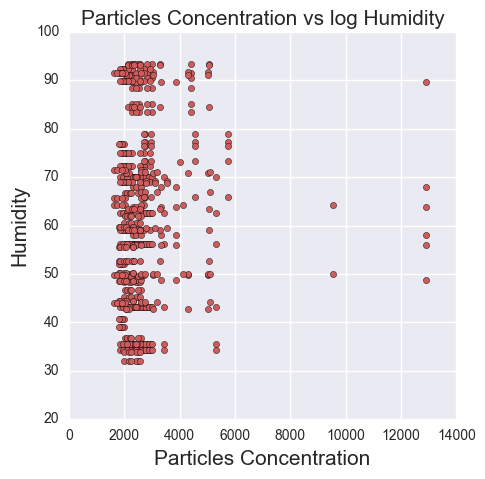

In [16]:
plt.figure(figsize= (5,5))
plt.scatter(sensor_weather.con,sensor_weather['Humidity'],c = 'IndianRed')
plt.title('Particles Concentration vs log Humidity', size = 15)
plt.ylabel('Humidity', size = 15)
plt.xlabel('Particles Concentration', size = 15)
plt.show()

**Fig 1:** Scatterplot of Particles concetration (particle count per 0.01 cubic feet) and Humidity (%)

In [17]:
sensor_weather['Humidity_log'] = np.log(sensor_weather['Humidity'])
sensor_weather['con_log'] = np.log(sensor_weather.con)

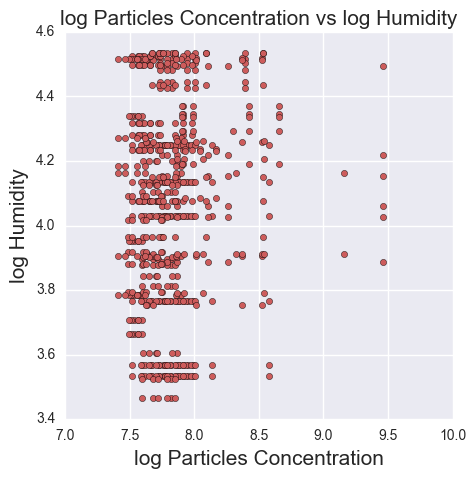

In [18]:
plt.figure(figsize= (5,5))
plt.scatter(sensor_weather['con_log'],sensor_weather['Humidity_log'],c = 'IndianRed')

plt.title('log Particles Concentration vs log Humidity', size = 15)
plt.ylabel('log Humidity', size = 15)
plt.xlabel('log Particles Concentration', size = 15)
plt.show()

**Fig2:** Scatterplot of logarithm of Particles concetration (particle count per 0.01 cubic feet) and logarithm of Humidity (%)

In [19]:
lm = smf.ols(formula = 'con_log ~ Humidity_log', data = sensor_weather).fit()

In [20]:
print 'Correlation coefficient: %f' % (stats.pearsonr(sensor_weather['Humidity_log'],sensor_weather['con_log'])[0])

Correlation coefficient: 0.108551


There is no correlation between the concentration and the Humidity.

In [21]:
sensor_weather['Temp_log'] =np.log(sensor_weather['Temp.'])

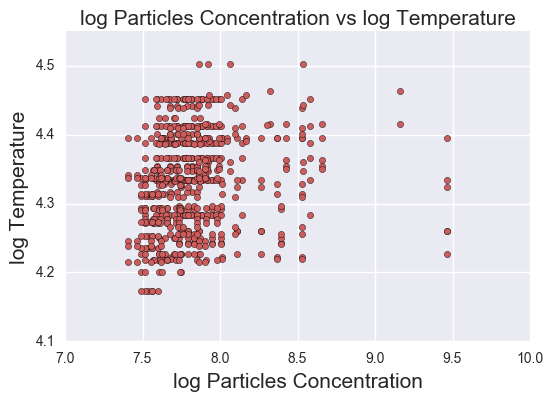

In [22]:
#plt.figure(figsize= (10,10)
plt.scatter(sensor_weather['con_log'],sensor_weather['Temp_log'],c = 'IndianRed')
plt.title('log Particles Concentration vs log Temperature', size = 15)
plt.ylabel('log Temperature', size = 15)
plt.xlabel('log Particles Concentration', size = 15)
plt.show()

**Fig3:** Scatterplot of logarithm of Particles concetration (particle count per 0.01 cubic feet) and logarithm of Temperature (ºF)

In [23]:
lm = smf.ols(formula = 'con_log ~ Temp_log', data = sensor_weather).fit()

In [24]:
print 'Correlation coefficient: %f' % (stats.pearsonr(sensor_weather['Temp_log'],sensor_weather['con_log'])[0])

Correlation coefficient: 0.163251


There is no correlation between the concentration and the Temperature.

In [31]:
##Viewing the specific dates from the detencion analysis:

In [32]:
weather[weather.date == '2016-06-27'][weather.Time=='20:00']

C:\Users\enrique\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,Time,Temp.,Humidity,Pressure,Day,date
41,20:00,70.82,89.6,30.012,27-06-2016,2016-06-27


In [33]:
weather[weather.date == '2016-06-29'][weather.Time=='8:00']

C:\Users\enrique\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,Time,Temp.,Humidity,Pressure,Day,date
50,8:00,74.7,70.833333,29.898333,29-06-2016,2016-06-29


In [34]:
weather[weather.date == '2016-06-29'][weather.Time=='12:00']

C:\Users\enrique\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,Time,Temp.,Humidity,Pressure,Day,date
51,12:00,81.025,49.75,29.865,29-06-2016,2016-06-29


In [35]:
weather[weather.date == '2016-07-08'][weather.Time=='20:00']

C:\Users\enrique\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,Time,Temp.,Humidity,Pressure,Day,date
101,20:00,82.675,64.25,29.82,6/7/2016,2016-07-08


In [36]:
weather[weather.date == '2016-07-10'][weather.Time=='12:00']

C:\Users\enrique\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,Time,Temp.,Humidity,Pressure,Day,date
105,12:00,82.65,73.166667,29.746667,7/7/2016,2016-07-10


Viewing the details days and hours from the events , also we can see that there no relation as spearman showed , but it is more likely to be a correlation with pressure than threy are around 30.

**Land USE and sensors**

In [25]:
pluto = pd.read_csv('BK.csv')

C:\Users\enrique\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (18,19,21,22,23,24,25,63,64,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
red_hook = pluto[pluto.ZipCode == 11231]

In [27]:
S0 = red_hook[red_hook.Address == '767 HICKS STREET']

In [28]:
S0.LandUse

9115    6.0
Name: LandUse, dtype: float64

In [29]:
S2 = red_hook[red_hook.Address == '106 FERRIS STREET']

In [30]:
S2.LandUse

9665    6.0
Name: LandUse, dtype: float64

It can be a relationship between LandUse and the sensors data as the type is the same

**Noise**

The noise level that was higher than the rest of the time is at 12 pm at 6/22

In [46]:
compl = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\Users\enrique\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
RHC = compl[compl['Incident Zip']==11231]

In [63]:
date=[]
for i in RHC['Created Date']:
    date.append(i.split(' ')[0])

In [67]:
RHC['day']=date

C:\Users\enrique\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [70]:
RHC[RHC['day']=='07/11/2016']

,﻿Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,day
19192,33811112,07/11/2016 11:50:00 AM,07/12/2016 10:00:00 AM,DEP,Department of Environmental Protection,Noise,Noise: Alarms (NR3),NaN,11231.0,301 DEGRAW STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.683451,-73.994451,"(40.683450761880025, -73.99445104779147)",07/11/2016
19252,33815570,07/11/2016 01:38:00 PM,07/15/2016 11:00:00 AM,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),NaN,11231.0,295 SMITH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.681927,-73.993705,"(40.68192737484613, -73.99370484130436)",07/11/2016
294093,33810053,07/11/2016 08:51:00 PM,07/13/2016 12:30:00 AM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11231.0,BUTLER STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.684639,-73.993387,"(40.68463919187584, -73.9933872906276)",07/11/2016


It can see that be detected that the sensors detected the noise from the alarm